In [29]:
knitr::opts_chunk$set(fig.show='hide', warning=FALSE, message=FALSE)


Link to paper on dataset: http://faculty.washington.edu/kenrice/heartgraphs/effectivegraphs.pdf

Dataset url: http://faculty.washington.edu/kenrice/heartgraphs/

###Setup

####Import packages (once per machine)


In [30]:
#install.packages("readr")
#install.packages("ggplot2")
#install.packages("ggbeeswarm")
#install.packages("dplyr")
#install.packages("MASS")
#install.packages("hexbin")


####Load packages (once per R session)


In [31]:
library(readr)
library(ggplot2)
#library(ggbeeswarm)
library(dplyr)
#library(MASS)
library(hexbin)


####Import data (using readr)

- Use readr package to import our csv
- assign the data file to an R object using (<-)



In [32]:
heart <- read_csv("http://faculty.washington.edu/kenrice/heartgraphs/nhaneslarge.csv", na=".") #na= tells R that . is an na value

Parsed with column specification:
cols(
  BPXSAR = col_double(),
  BPXDAR = col_double(),
  BPXDI1 = col_integer(),
  BPXDI2 = col_integer(),
  race_ethc = col_character(),
  gender = col_character(),
  DR1TFOLA = col_integer(),
  RIAGENDR = col_integer(),
  BMXBMI = col_double(),
  RIDAGEYR = col_integer()
)




- run the command head ( ) and check with your partner to see if you got the same output


In [33]:
head(heart)

BPXSAR,BPXDAR,BPXDI1,BPXDI2,race_ethc,gender,DR1TFOLA,RIAGENDR,BMXBMI,RIDAGEYR
108.0000,56.00000,56,58,Other,Male,434,1,25.83,65
117.3333,60.00000,56,64,Hispanic,Male,241,1,25.73,74
120.0000,82.66667,80,86,White non-Hispanic,Male,380,1,24.49,54
88.0000,52.00000,52,NA,White non-Hispanic,Female,152,2,20.76,9
150.6667,96.00000,100,94,Black non-Hispanic,Male,422,1,24.63,49
99.0000,62.00000,66,62,White non-Hispanic,Male,319,1,21.35,69



## Univariate Plots: Folate intake by gender

### Basic ggplot Anatomy

ggplot code makes graphs by layering imformation on top of an empty plot


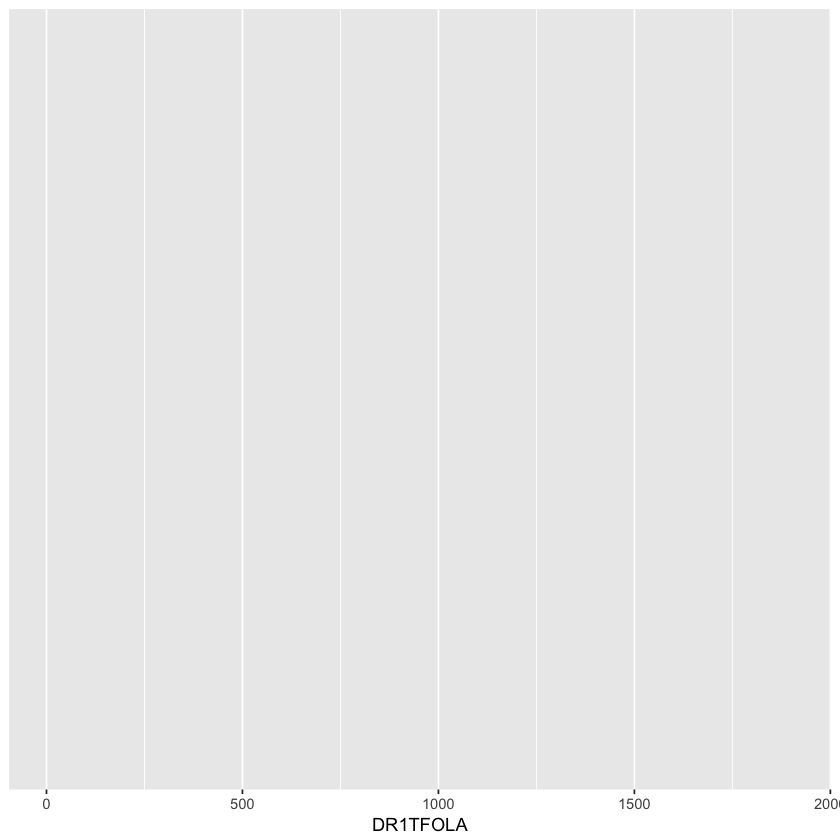

In [34]:
ggplot(heart, aes(x=DR1TFOLA))
#This says we want ggplot to use the data.frame heart and to plot DR1TFOLA on the x-axis.



### Histogram

create a histogram by adding a geom layer and using the "+" sign


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


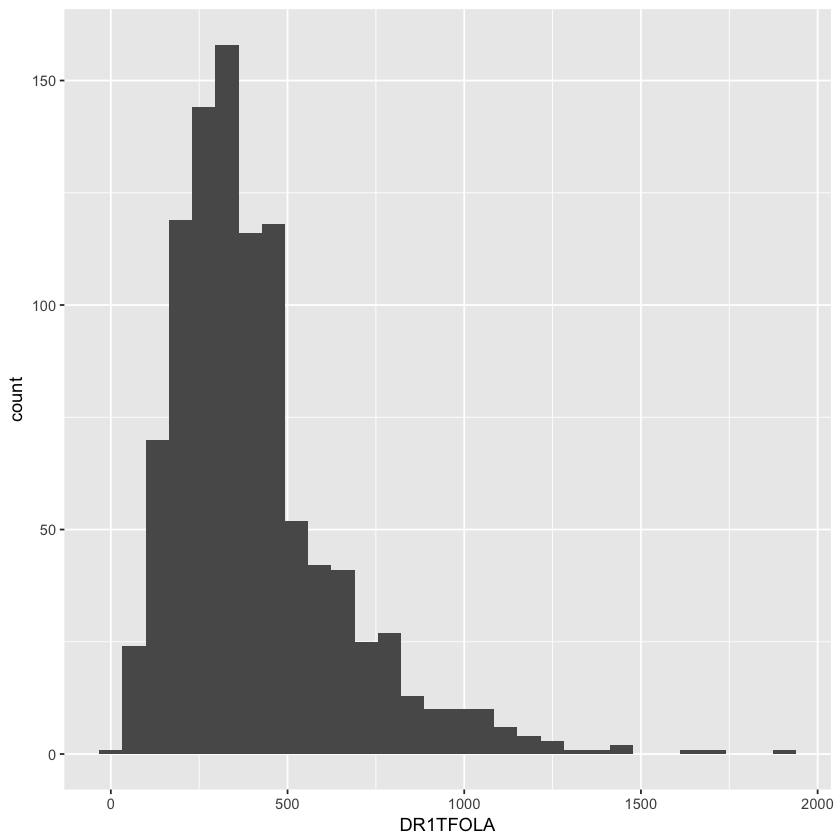

In [35]:
ggplot(heart, aes(x=DR1TFOLA)) +
  geom_histogram()


#### Labels
change x-axis label from "DR1TFOLA" to "Folate Intake"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


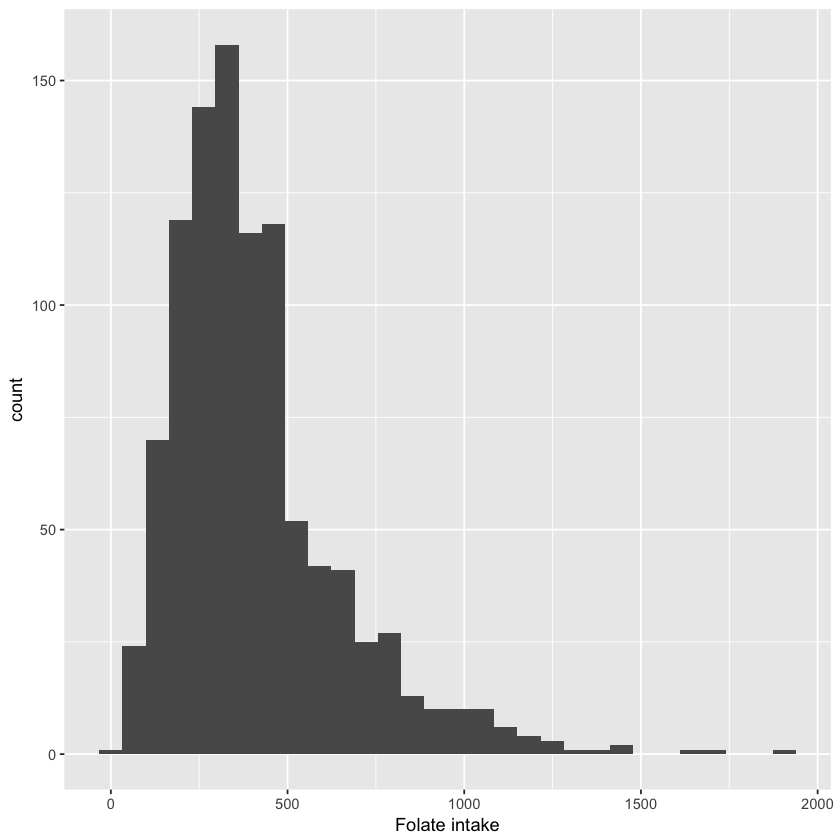

In [36]:
ggplot(heart, aes(x=DR1TFOLA)) +
  geom_histogram() +
  labs(x = "Folate intake") #x-axis label


#### Changing Colors

change outline color


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


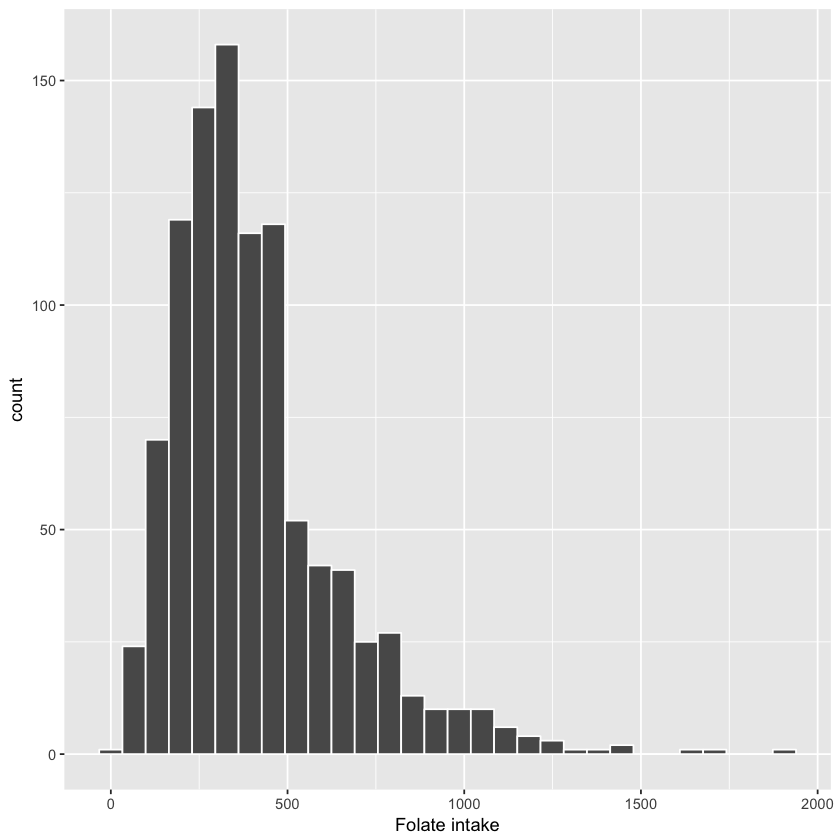

In [37]:
ggplot(heart, aes(x=DR1TFOLA)) +
  geom_histogram(colour = "white") +
  labs(x = "Folate intake")


change the fill of the bars


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


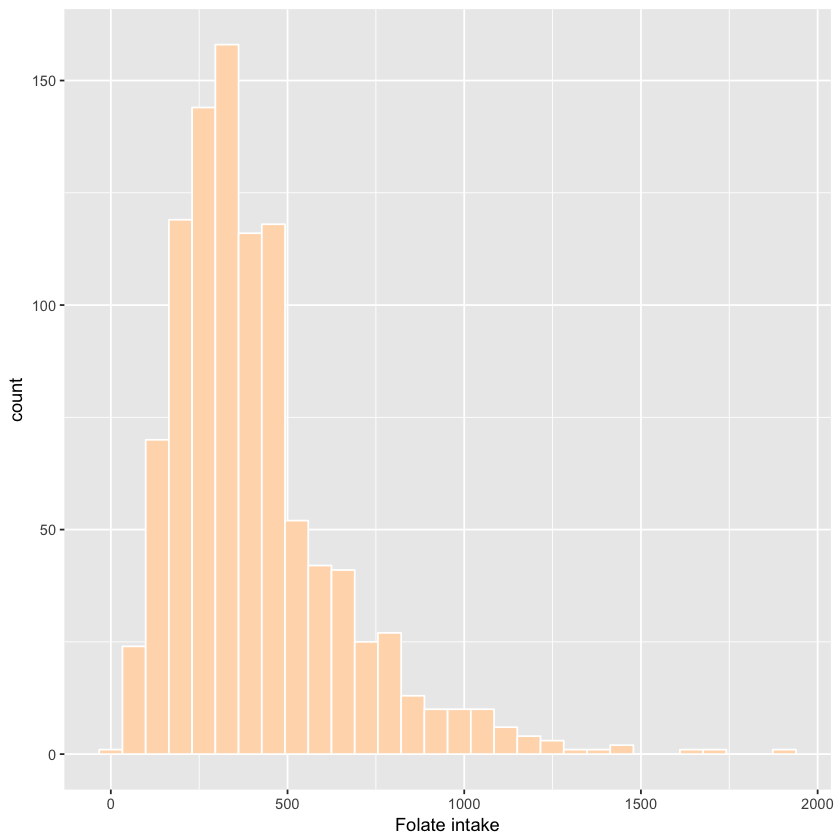

In [38]:
ggplot(heart, aes(x=DR1TFOLA)) +
  geom_histogram(colour = "white", fill = "peachpuff") + #yes, that is a name of a color
  labs(x = "Folate intake")


#### Documentation and the Help Command
language will be different for each type of graph so make sure to reference your documentation by typing "?command"


In [39]:
?geom_histogram


#### Histogram Bins and ggplot Defaults
All of our histogram plots have given us this warning:


In [40]:
#`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

*This warning tells us that this is a default that ggplot chose for us given the data it has.*

change bin size


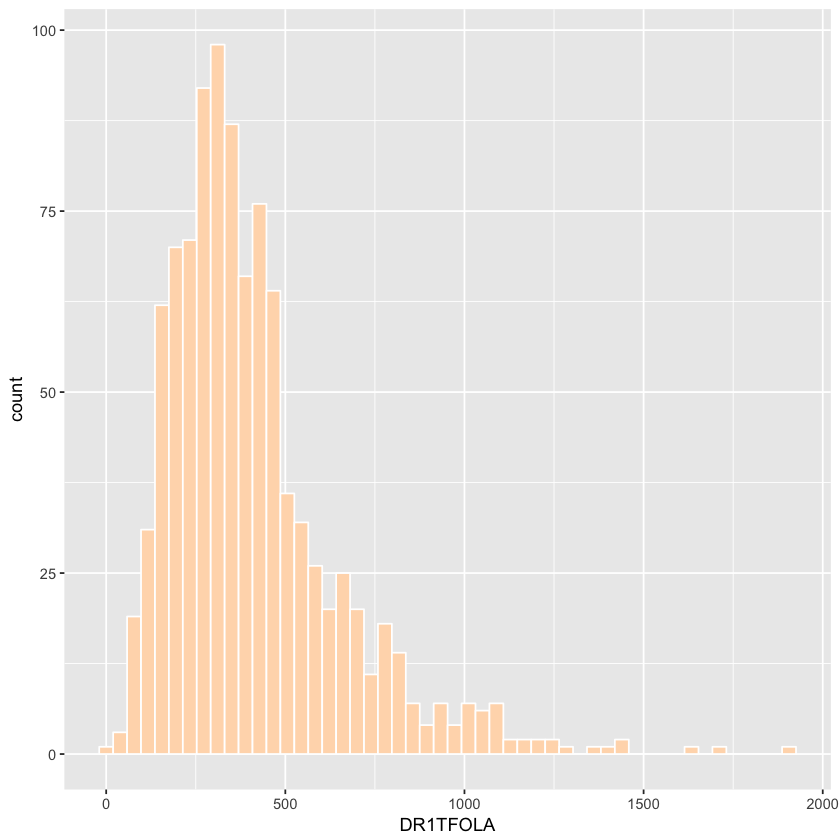

In [41]:
ggplot(heart, aes(x=DR1TFOLA)) +
  geom_histogram(colour = "white", fill = "peachpuff", bins = 50)


#### Facet Wrap

add facet_wrap for split plots based on a variable


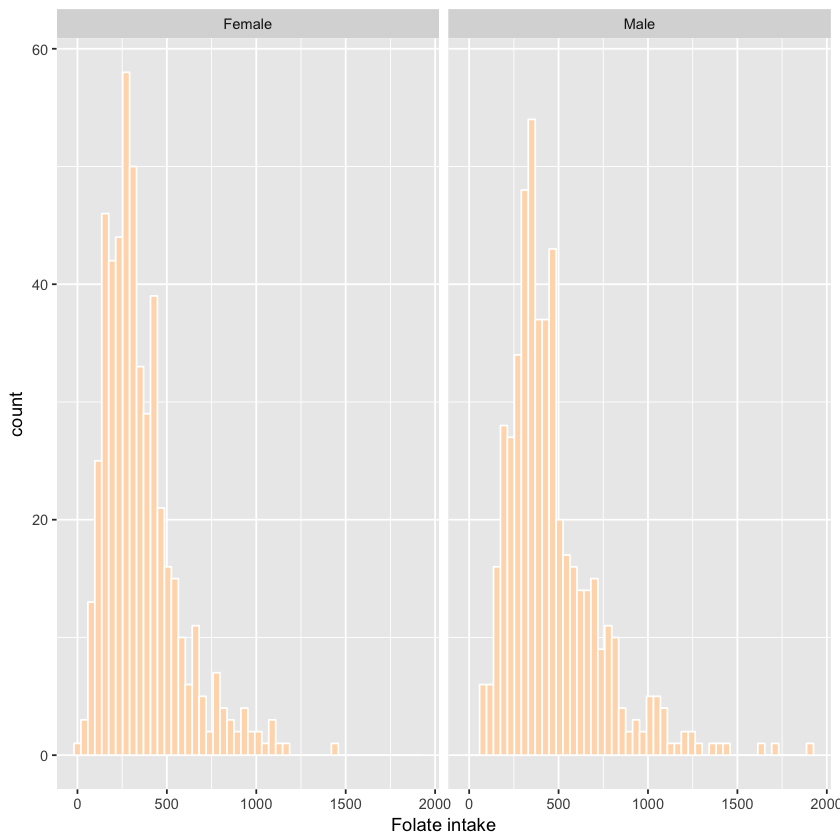

In [42]:
ggplot(heart, aes(x = DR1TFOLA)) +
  geom_histogram(colour = "white", fill = "peachpuff", bins = 50) +
  labs(x = "Folate intake") +
  facet_wrap(~gender)



### Density Plot

change the geom_ histogram layer to geom_density


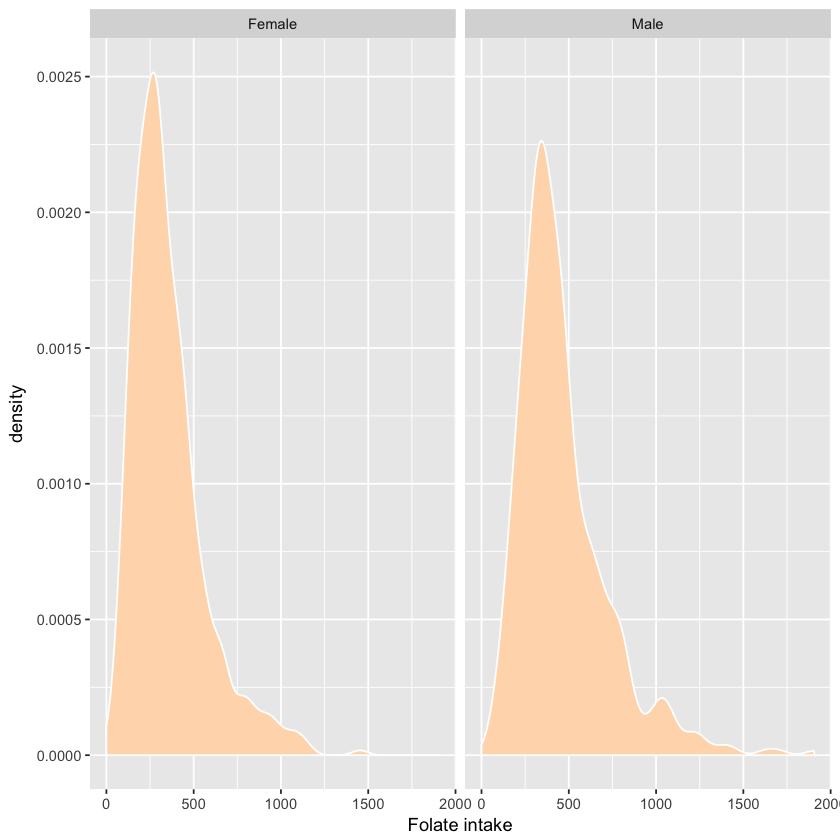

In [43]:
ggplot(heart, aes(x = DR1TFOLA)) +
  geom_density(colour = "white", fill = "peachpuff") +  #Make sure to take out bin=50
  labs(x = "Folate intake") +
  facet_wrap(~gender)


#### Adding a third dimension onto one plot

plot all three variables from last plot (folate, density, and gender) on one by using color to differentiate gender



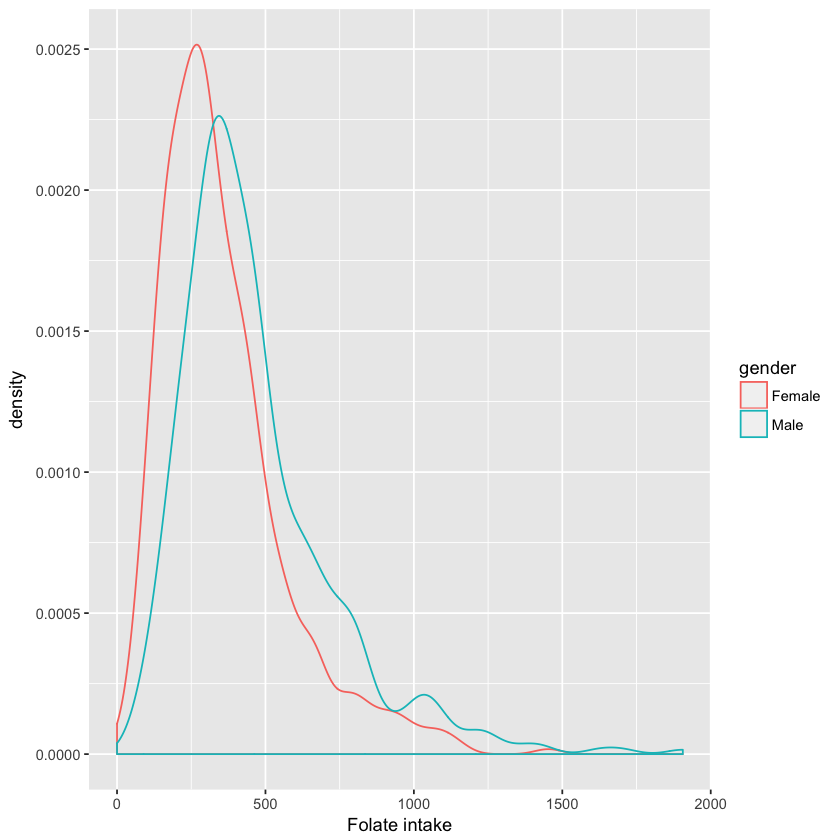

In [44]:
ggplot(heart, aes(x = DR1TFOLA)) +
  geom_density(aes(colour = gender)) + #Notice moving the colour into aesthetics
  labs(x = "Folate intake")


## Univariate Plots: Systolic blood pressure by gender

###Dotplot - Stripchart

create a stripchart of `BPXSAR`(or systolic blood pressure) by gender


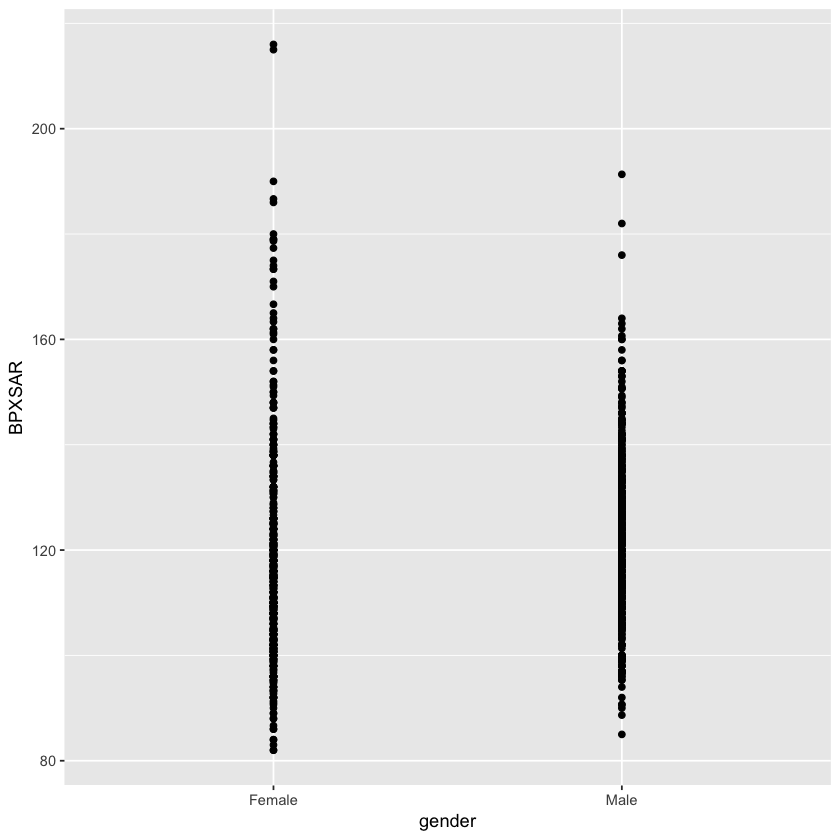

In [45]:
ggplot(heart, aes(x = gender, y = BPXSAR)) +
  geom_point()


#### Customizing our Dotplot

add an alpha in the geom layer to make our points more transparent

 - *Alpha works on a scale from 0 (clear) to 1 (opaque)*



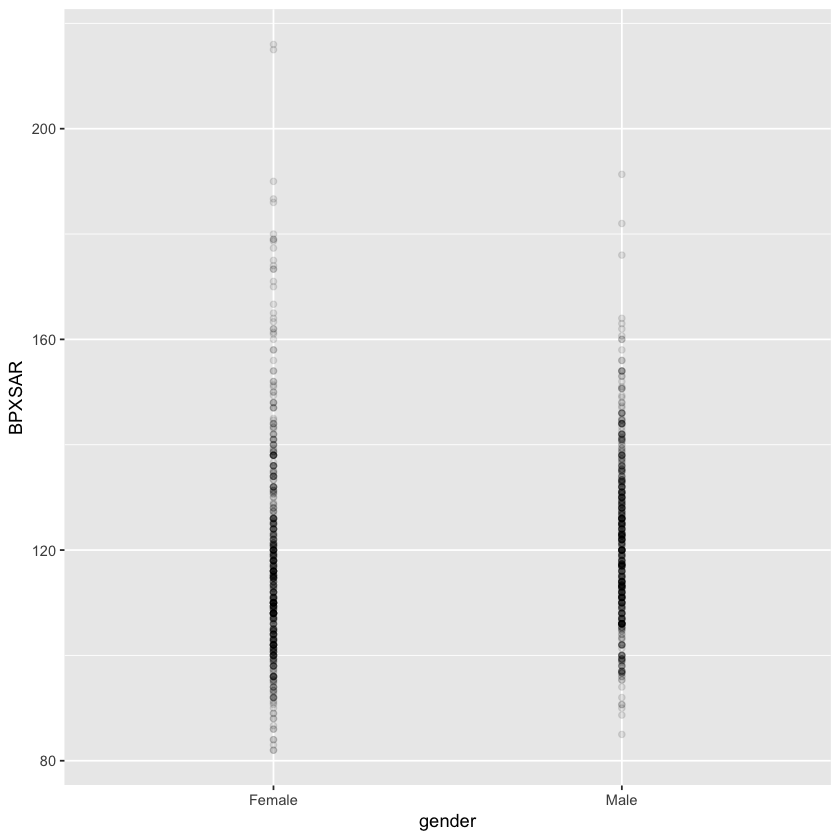

In [46]:
ggplot(heart, aes(x = gender, y = BPXSAR)) +
  geom_point(alpha = .1)


add jitter to space out our points


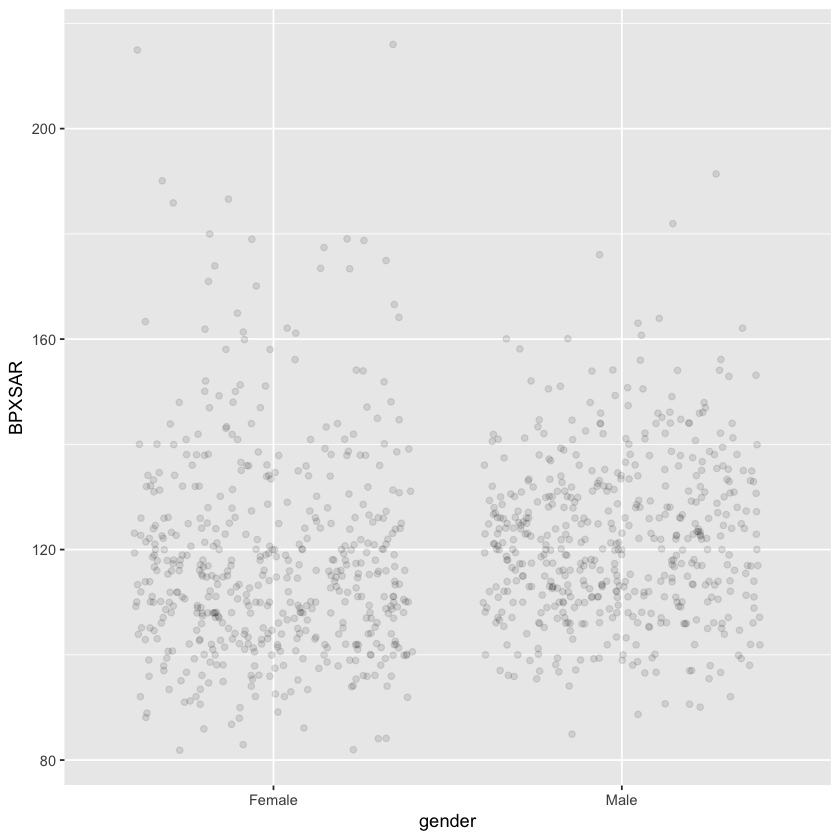

In [47]:
ggplot(heart, aes(x = gender, y = BPXSAR)) +
  geom_jitter(alpha = .1)


Notes about Jitter:

- jitter automatically adds space (noise) to both the height and the width of your plots

- which variables won't be effected by noice - categorical

change jitter to width only


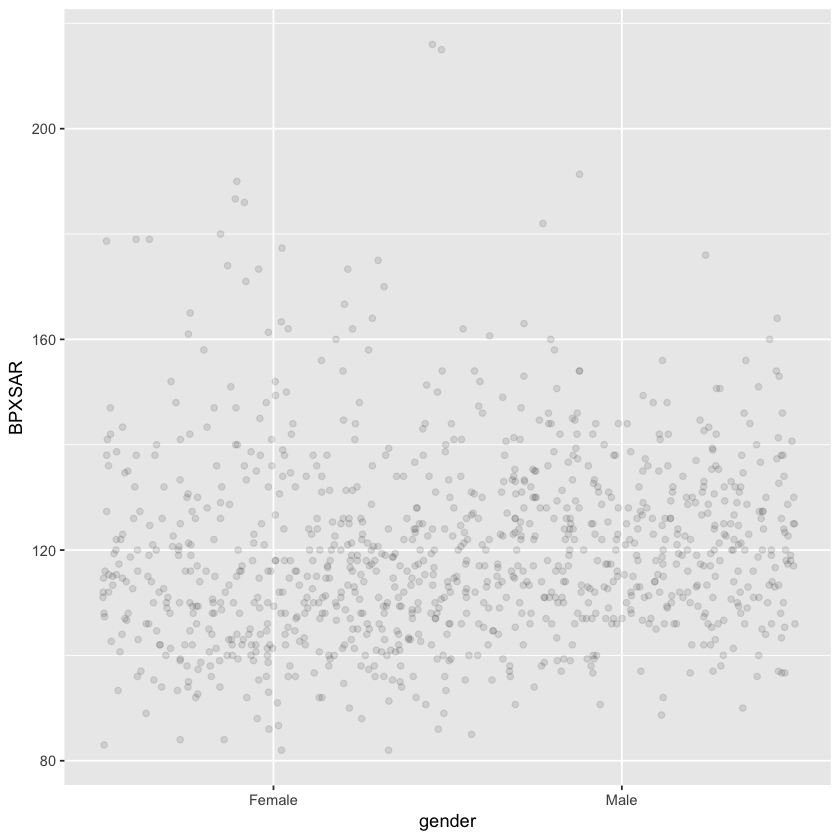

In [48]:
ggplot(heart, aes(x = gender, y = BPXSAR)) +
  geom_jitter(alpha = .1, width = .5, height = 0)


change our x- and y-axis labels


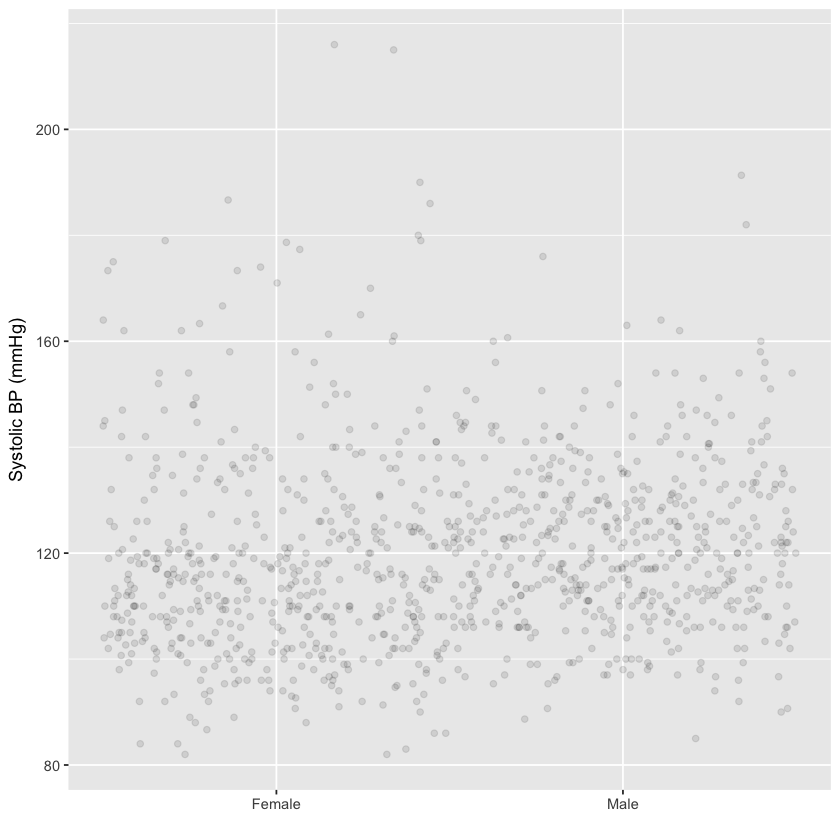

In [49]:
ggplot(heart, aes(x = gender, y = BPXSAR)) +
  geom_jitter(alpha = .1, width = .5, height = 0) +
  labs(x = "", y = "Systolic BP (mmHg)")


### Beeswarm Plot



In [55]:
#ggplot(heart, aes(x = gender, y = BPXSAR)) +
#  geom_beeswarm(alpha = .2) +
#  labs(x = "Systolic BP (mmHg)", y = "")



#### Stats layers

add statistics on top of your plots with stat_summary


In [56]:
#ggplot(heart, aes(x = gender, y = BPXSAR)) +
#  geom_beeswarm(alpha = .2) +
#  stat_summary(fun.y = "mean", geom = "point", colour = "orange") +
#  labs(x = "Systolic BP (mmHg)", y = "")



#### Layering geom types

add other plot types as geom layers


In [57]:
#ggplot(heart, aes(x = gender, y = BPXSAR)) +
#  geom_boxplot(outlier.shape = NA) +   #outlier.shape=NA tells boxplot not to plot outliers
#  geom_beeswarm(alpha = .2) +
#  labs(x = "Systolic BP (mmHg)", y = "")


##### Layer order
order is important (will change the order things are plotted)


In [58]:
#ggplot(heart, aes(x = gender, y = BPXSAR)) +
#  geom_beeswarm(alpha = .2) +
#  geom_boxplot(outlier.shape = NA) +
#  labs(x = "Systolic BP (mmHg)", y = "")




### Extra Challenge
#### Violin plot

If that was easy for you, give this a shot. Try and recreate the plots below using what you learned above.

*Hint: We are using "geom_violin".*



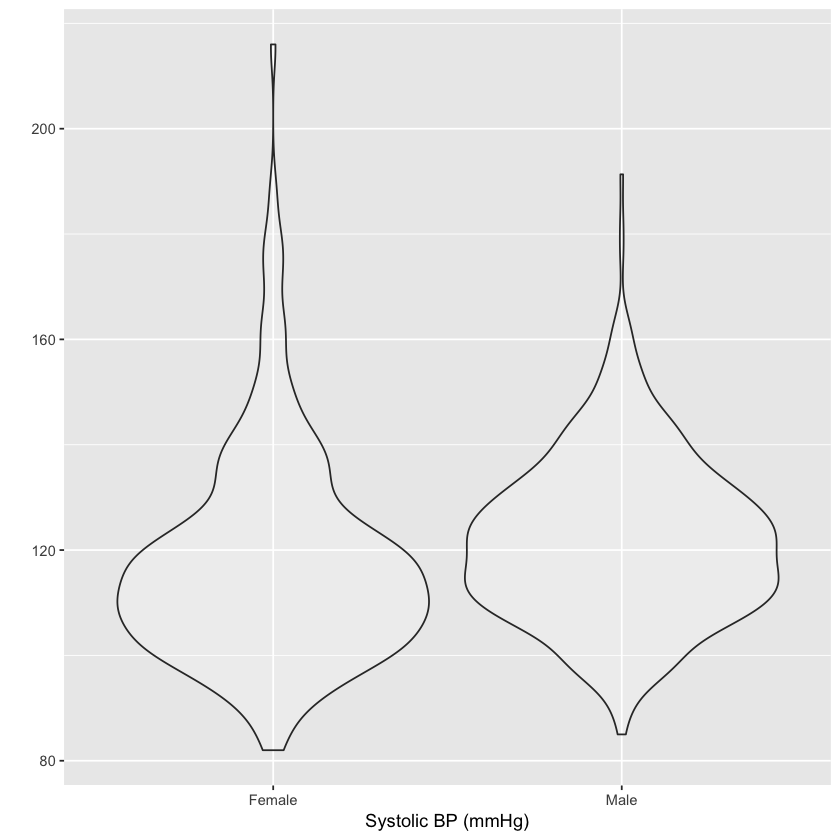

In [59]:
ggplot(heart, aes(x = gender, y = BPXSAR)) +
  geom_violin(alpha = .2) +
  labs(x = "Systolic BP (mmHg)", y = "")


Try adding some statistics to your plot. You can start with the mean and the median.


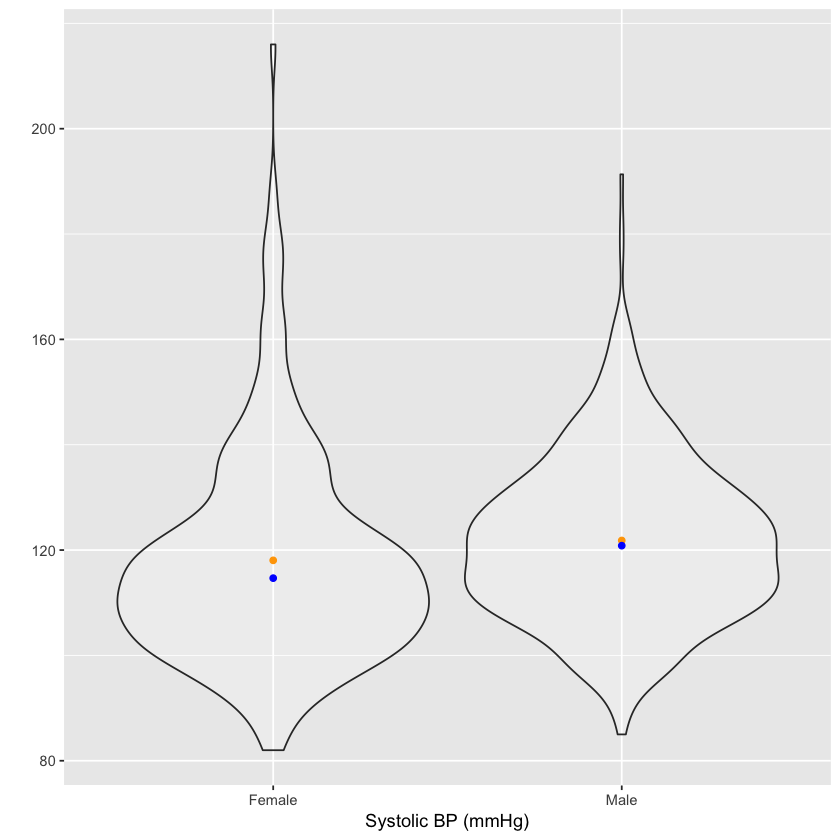

In [60]:
ggplot(heart, aes(x = gender, y = BPXSAR)) +
  geom_violin(alpha = .2) +
  stat_summary(fun.y = "mean", geom = "point", colour = "orange") +
  stat_summary(fun.y = "median", geom = "point", colour = "blue") +
  labs(x = "Systolic BP (mmHg)", y = "")


Try adding another geom layer.

*Hint: Do you want to include your outlier points?*



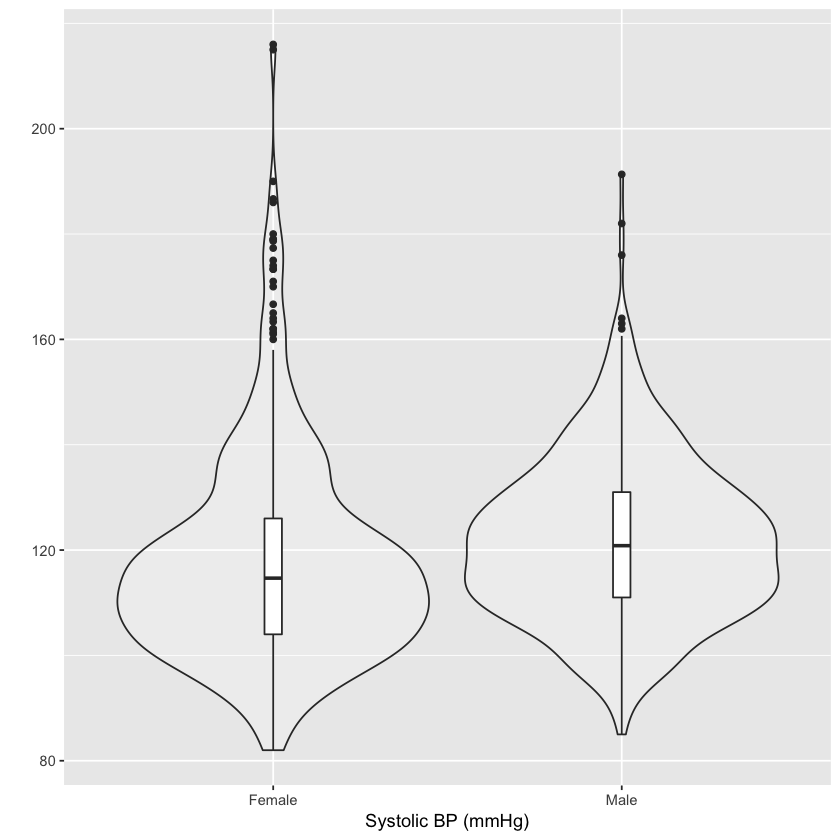

In [61]:
ggplot(heart, aes(x = gender, y = BPXSAR)) +
  geom_violin(alpha = .2) +
  geom_boxplot(width = .05) +
  labs(x = "Systolic BP (mmHg)", y = "")


# Bivariate Plots: Age & Systolic Blood Pressure

Simple scatterplot


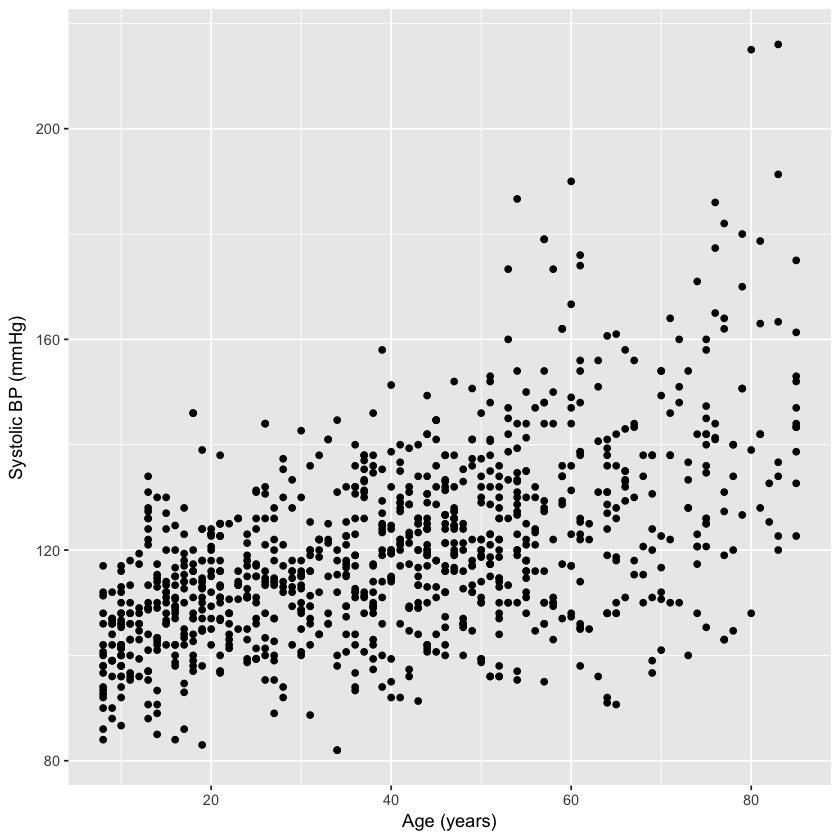

In [62]:
ggplot(heart, aes(x = RIDAGEYR, y = BPXSAR)) +
  geom_point() +
  labs(x = "Age (years)", y = "Systolic BP (mmHg)")


If you have big n, try hexbin plot


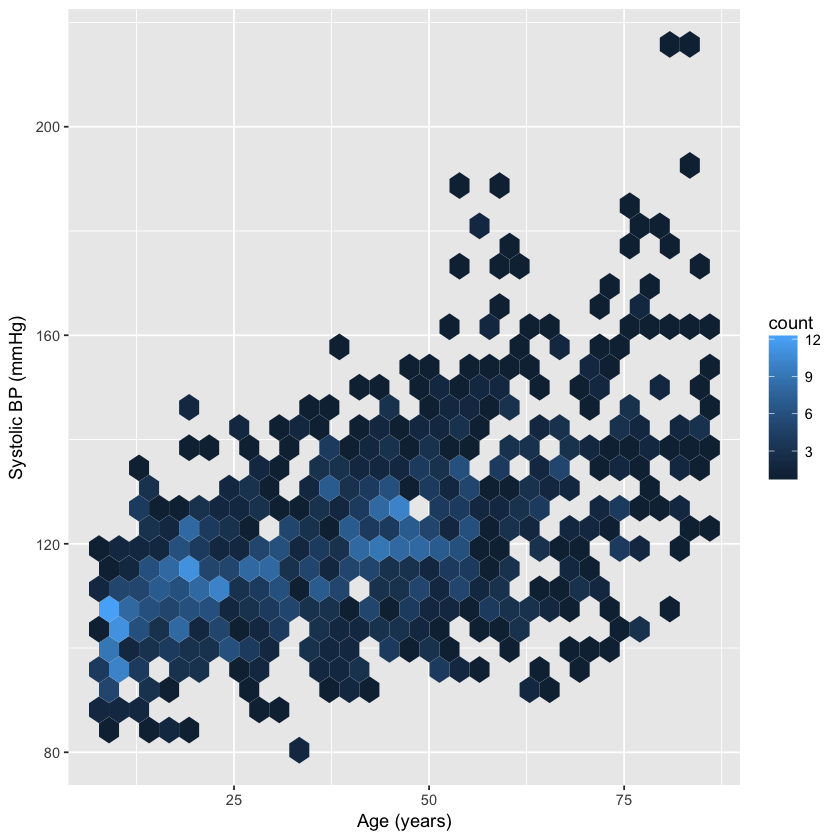

In [63]:
ggplot(heart, aes(x = RIDAGEYR, y = BPXSAR)) +
  geom_hex() +
  labs(x = "Age (years)", y = "Systolic BP (mmHg)")


Add linear regression line with SE


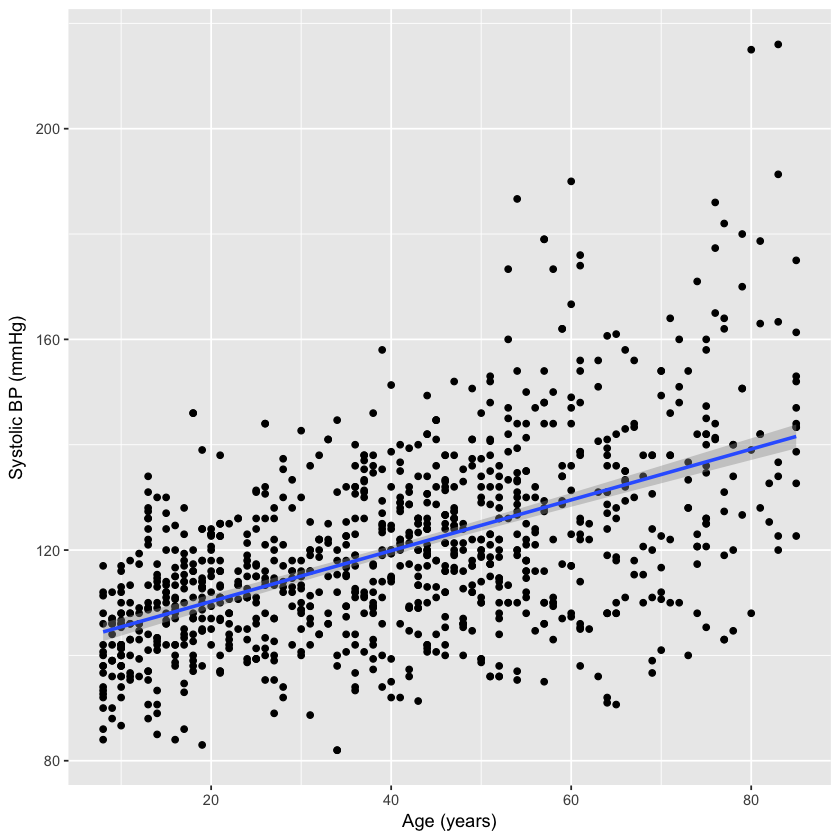

In [64]:
ggplot(heart, aes(x = RIDAGEYR, y = BPXSAR)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(x = "Age (years)", y = "Systolic BP (mmHg)")


Default is loess line


`geom_smooth()` using method = 'gam'


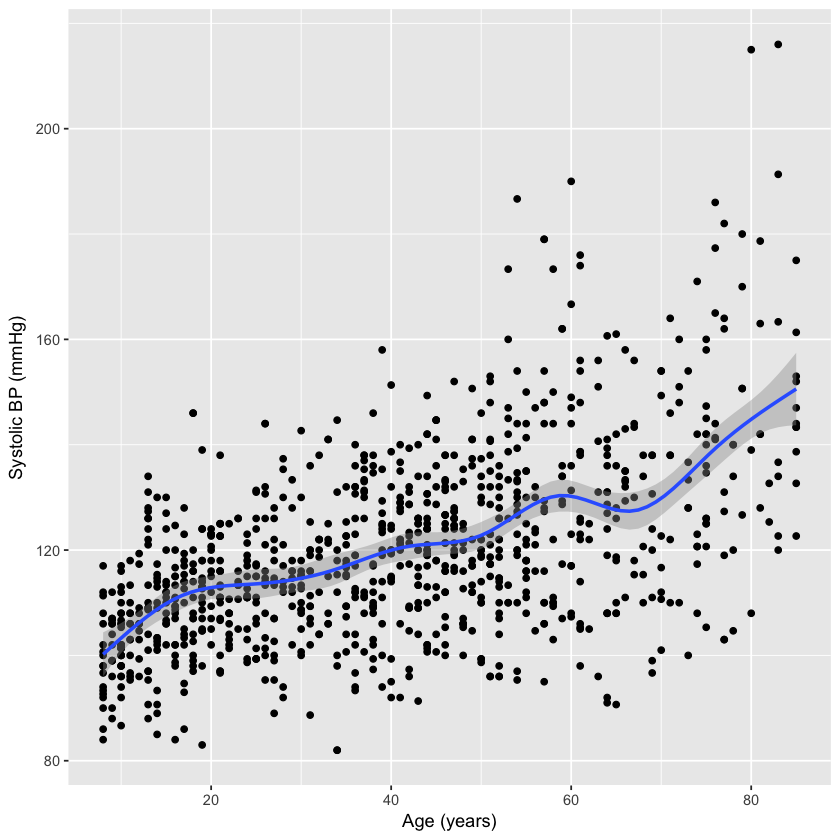

In [65]:
ggplot(heart, aes(x = RIDAGEYR, y = BPXSAR)) +
  geom_point() +
  geom_smooth() +
  labs(x = "Age (years)", y = "Systolic BP (mmHg)")


Add splines



Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



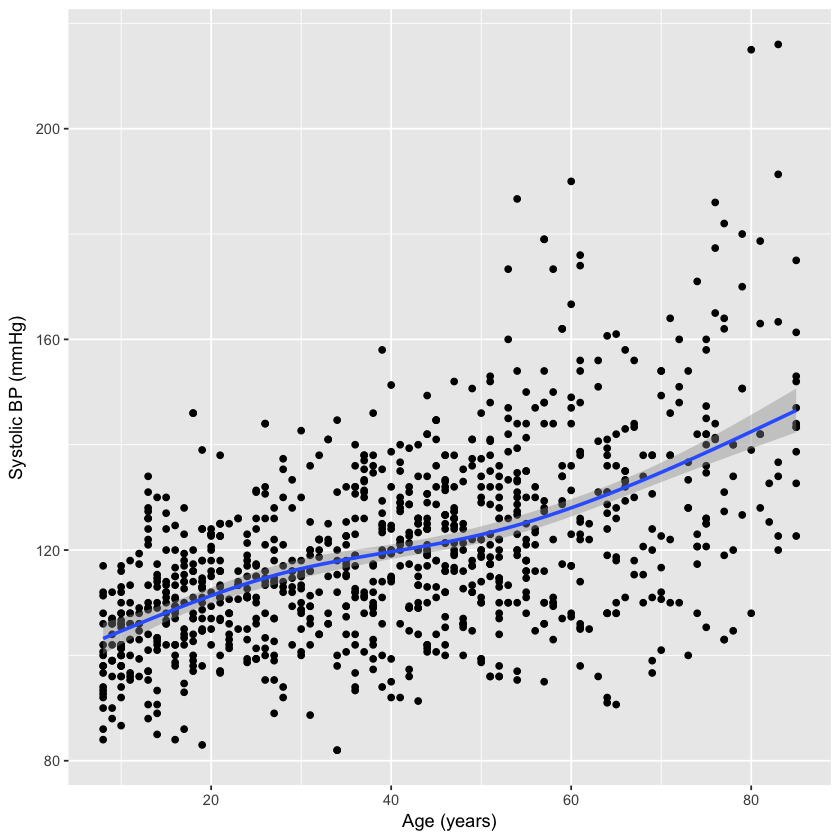

In [66]:
library(splines)
library(MASS)
ggplot(heart, aes(x = RIDAGEYR, y = BPXSAR)) +
  geom_point() +
  stat_smooth(method = "lm", formula = y ~ ns(x, 3)) +
  labs(x = "Age (years)", y = "Systolic BP (mmHg)")


# Multivariable Plots: Body Mass Index & Systolic BP, by gender and age

Just copy this:


In [67]:
library(dplyr)
heart2 <- heart %>%
  mutate(age_cat = cut(RIDAGEYR,c(0,30,55,100)))


Recreate theirs first



Warning message:
“Removed 9 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 9 rows containing missing values (geom_point).”

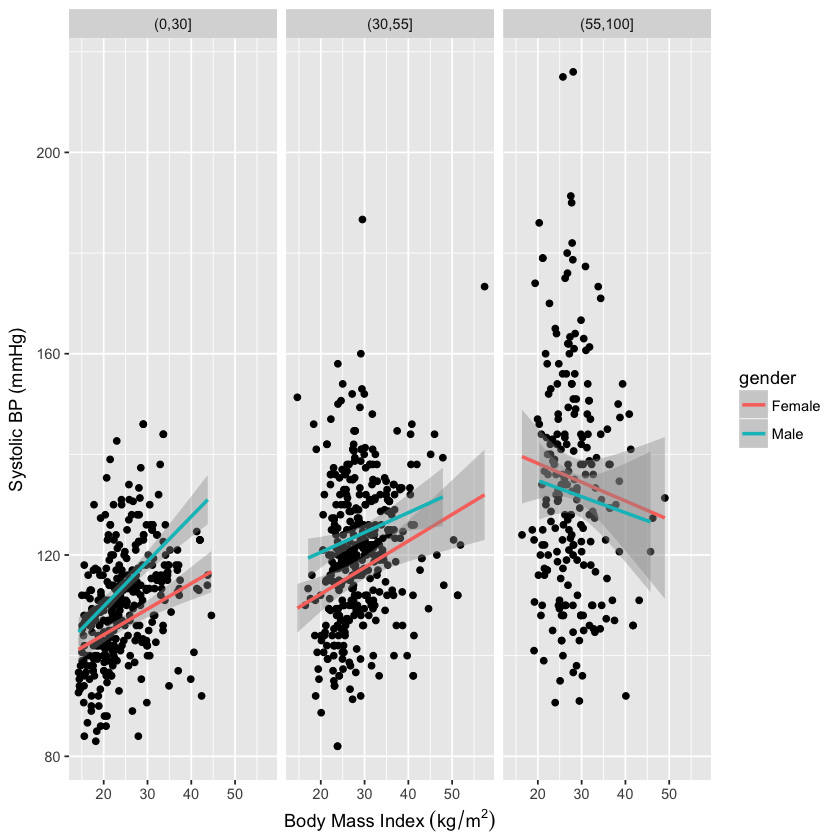

In [68]:
ggplot(heart2, aes(x = BMXBMI, y = BPXSAR)) +
  geom_point() +
  stat_smooth(aes(colour = gender), method = "lm") +
  facet_wrap(~age_cat) +
  labs(x = "Body Mass Index"~(kg/m^2), y = "Systolic BP (mmHg)")


Try with facet grid, update labels



Warning message:
“Removed 9 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 9 rows containing missing values (geom_point).”

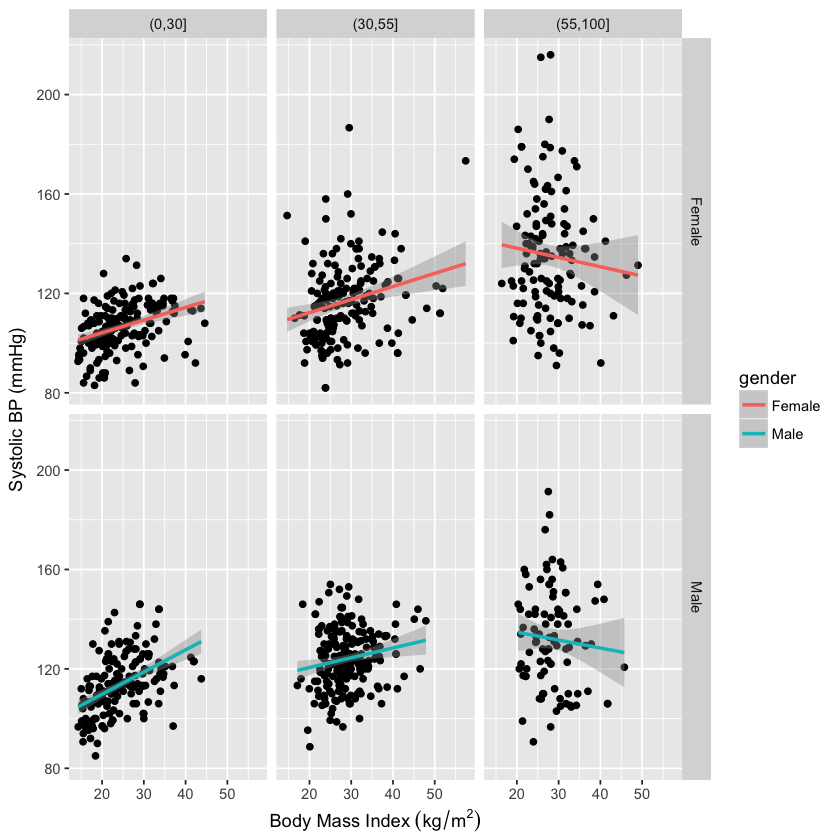

In [69]:
ggplot(heart2, aes(x = BMXBMI, y = BPXSAR)) +
  geom_point() +
  stat_smooth(aes(colour = gender), method = "lm") +
  facet_grid(gender~age_cat) +
  labs(x = "Body Mass Index"~(kg/m^2), y = "Systolic BP (mmHg)")


Play with colors!


Warning message:
“Removed 9 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 9 rows containing missing values (geom_point).”

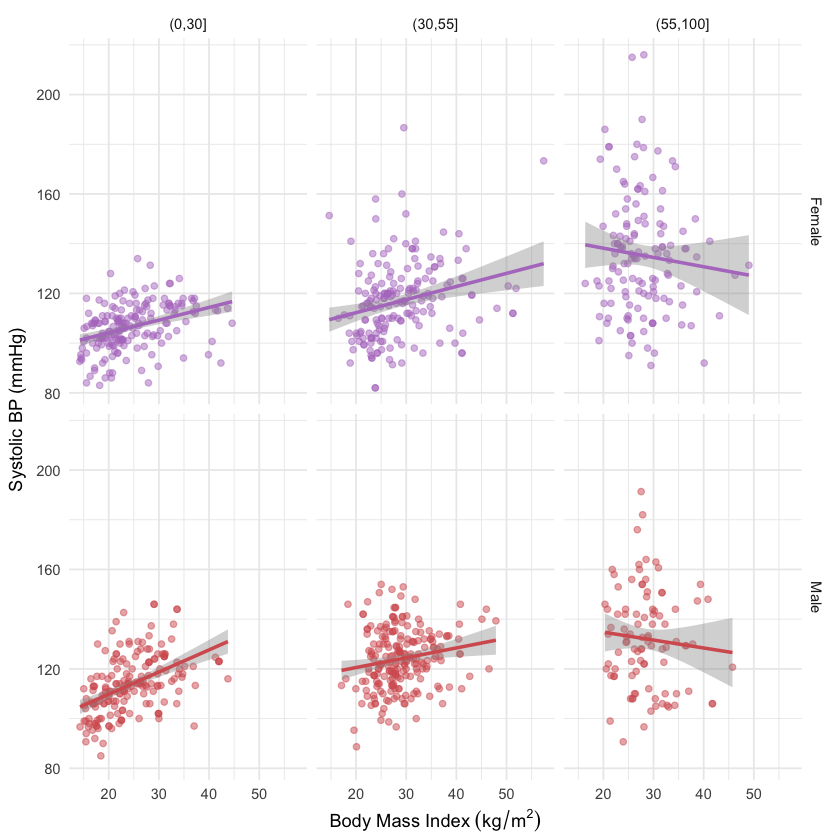

In [70]:
ggplot(heart2, aes(x = BMXBMI, y = BPXSAR, colour = gender)) +
  geom_point(alpha = .5) +
  stat_smooth(method = "lm") +
  facet_grid(gender~age_cat) +
  theme_minimal() +
  labs(x = "Body Mass Index"~(kg/m^2), y = "Systolic BP (mmHg)") +
  scale_color_manual(values = c("#B47CC7", "#D65F5F"), guide = FALSE)

Warning message:
“Removed 9 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 9 rows containing missing values (geom_point).”

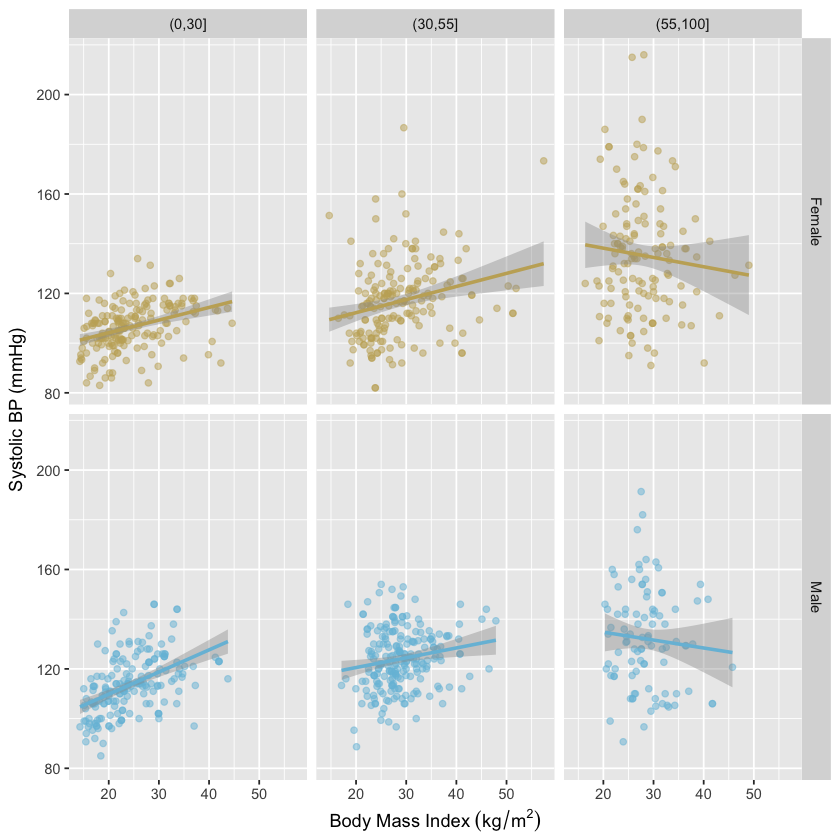

In [71]:
my_colors <- c("#C4AD66", "#77BEDB")
ggplot(heart2, aes(x = BMXBMI, y = BPXSAR, colour = gender)) +
  geom_point(alpha = .5) +
  stat_smooth(method = "lm") +
  facet_grid(gender~age_cat) +
  labs(x = "Body Mass Index"~(kg/m^2), y = "Systolic BP (mmHg)") +
  scale_color_manual(values = my_colors, guide = FALSE)